In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
paths =[r'C:\Users\user\Downloads\banking dataset\bank.csv', r'C:\Users\user\Downloads\banking dataset\bank-full.csv']

In [3]:
dataset=pd.concat([pd.read_csv(path) for path in paths], axis=0)

In [4]:

all_dataset=[dataset[columns].value_counts() for columns in dataset.columns]

In [5]:
dataset.job.value_counts()


blue-collar      10678
management       10427
technician        8365
admin.            5649
services          4571
retired           2494
self-employed     1762
entrepreneur      1655
unemployed        1431
housemaid         1352
student           1022
unknown            326
Name: job, dtype: int64

In [6]:
dataset.marital.value_counts()

married     30011
single      13986
divorced     5735
Name: marital, dtype: int64

In [7]:
dataset.education.value_counts()

secondary    25508
tertiary     14651
primary       7529
unknown       2044
Name: education, dtype: int64

In [8]:
dataset.contact.value_counts()

cellular     32181
unknown      14344
telephone     3207
Name: contact, dtype: int64

In [9]:
dataset.month.value_counts()

may    15164
jul     7601
aug     6880
jun     5872
nov     4359
apr     3225
feb     2871
jan     1551
oct      818
sep      631
mar      526
dec      234
Name: month, dtype: int64

In [10]:
job_loan=dataset.groupby(['job', 'loan']).agg(counts=('loan', 'count')).reset_index()
yes_loan=job_loan[job_loan.loan=='yes']


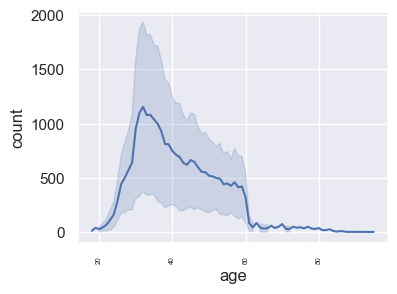

In [11]:
loan_dataset=dataset.groupby('age').agg(count =('loan', 'value_counts')).reset_index()
loan_dataset.query("loan =='yes'")
sns.set(rc=({'figure.figsize':(4,3)}))
sns.lineplot(loan_dataset, x='age', y='count')
plt.xticks(rotation=90, size=5)
plt.show()

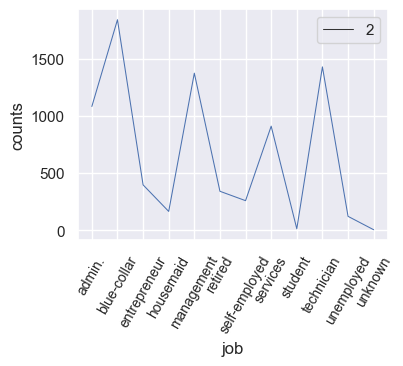

In [12]:
sns.lineplot(yes_loan, x='job', y='counts',size=2 )
plt.xticks(rotation =60, size=10)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


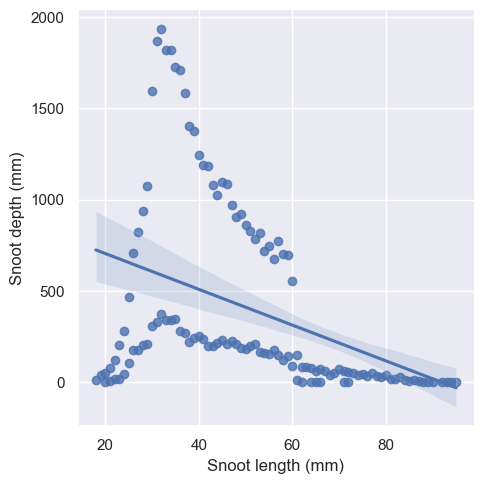

In [13]:
sns.set_theme()

g = sns.lmplot(
    data=loan_dataset,
    x="age", y="count",
    height=5,  palette=None
)
g.set_axis_labels("Snoot length (mm)", "Snoot depth (mm)")
plt.show()

## machine learning algorithms 

In [14]:
### importing the relevant libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import classification_report,recall_score, precision_score, confusion_matrix,accuracy_score

In [15]:
dataset['job'].replace(['unknown'], dataset['job'].mode(),inplace=True)
dataset['education'].replace(['unknown'], dataset['education'].mode(),inplace=True)
dataset['contact'].replace(['unknown'], dataset['contact'].mode(),inplace=True)
dataset['poutcome'].replace(['unknown'], dataset['poutcome'].mode(),inplace=True)

In [16]:
dataset.default=dataset['default'].replace({'yes':1, 'no':0})
dataset.loan=dataset['loan'].replace({'yes':1, 'no':0})
dataset.housing=dataset['housing'].replace({'yes':1, 'no':0})
dataset.y=dataset['y'].replace({'yes':1, 'no':0})




In [17]:
dataset=dataset.drop(['day','previous', 'pdays', 'month'], axis=1)

In [18]:
#### some cleaning and updates
dataset=pd.get_dummies(dataset, columns=['marital','education', 'contact', 'poutcome', 'job'])


In [19]:
data=dataset.drop('y', axis=1)

In [20]:
target=dataset.pop('y')

In [21]:
x_train, x_test, y_train, y_test=train_test_split(data, target, train_size=.6, random_state=0)

In [22]:
lg=LogisticRegression(max_iter=300)
lg_model=lg.fit(x_train, y_train)
lg_y_pred=lg_model.predict(x_test)


In [23]:
print(confusion_matrix(lg_y_pred, y_test))
print(precision_score(lg_y_pred, y_test))
print(recall_score(lg_y_pred, y_test))


print(classification_report(lg_y_pred, y_test))


[[17151  1603]
 [  387   752]]
0.31932059447983013
0.6602282704126426
              precision    recall  f1-score   support

           0       0.98      0.91      0.95     18754
           1       0.32      0.66      0.43      1139

    accuracy                           0.90     19893
   macro avg       0.65      0.79      0.69     19893
weighted avg       0.94      0.90      0.92     19893



In [24]:
rg=RidgeClassifier(max_iter=10000)

In [25]:
rg_model=rg.fit(x_train, y_train)
rg_y_pred=rg_model.predict(x_test)
print(f'confusion matrix:{confusion_matrix(rg_y_pred,y_test)}')
print(f'precision score:{precision_score(rg_y_pred,y_test)}')
print(f'recall_score:{recall_score(rg_y_pred,y_test)}')
print(f'accurancy:{accuracy_score(rg_y_pred,y_test)}')
print(classification_report(rg_y_pred, y_test))

confusion matrix:[[17218  1725]
 [  320   630]]
precision score:0.267515923566879
recall_score:0.6631578947368421
accurancy:0.8972000201075755
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     18943
           1       0.27      0.66      0.38       950

    accuracy                           0.90     19893
   macro avg       0.62      0.79      0.66     19893
weighted avg       0.95      0.90      0.92     19893



In [44]:
parameters ={'solver':['sparse_cg','cholesky'], 'alpha':[np.random.randint(1, 10, 1)]}


In [45]:
grid_modelling =GridSearchCV(estimator=rg, param_grid=parameters, verbose=0)

In [51]:
grid_modelling.fit(x_train, y_train)
grid_y_pred=grid_modelling.predict(x_test)
print (classification_report(grid_y_pred, y_test))
print (f'precision: {precision_score(grid_y_pred,y_test)}')
print(f'recall :{recall_score(grid_y_pred, y_test)}')

              precision    recall  f1-score   support

           0       0.98      0.91      0.94     18953
           1       0.27      0.67      0.38       940

    accuracy                           0.90     19893
   macro avg       0.62      0.79      0.66     19893
weighted avg       0.95      0.90      0.92     19893

precision: 0.2670912951167728
recall :0.6691489361702128
